In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

In [41]:
df = pd.read_csv('movieReplicationSet.csv')
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


## Q1 - Are movies that are more popular  rated higher than movies that are less popular? 

##### [Hint: You can do a median-split of popularity to determinehigh vs. low popularitymovies]

Mann-Whitney U statistic: 1242808144.5, with p-value: 0.0
The differences in the ratings between high popularity group and low popularity group are unlikely to be due to chance alone. Therefore, movies that are more popular are rated higher than movies that are less popular.


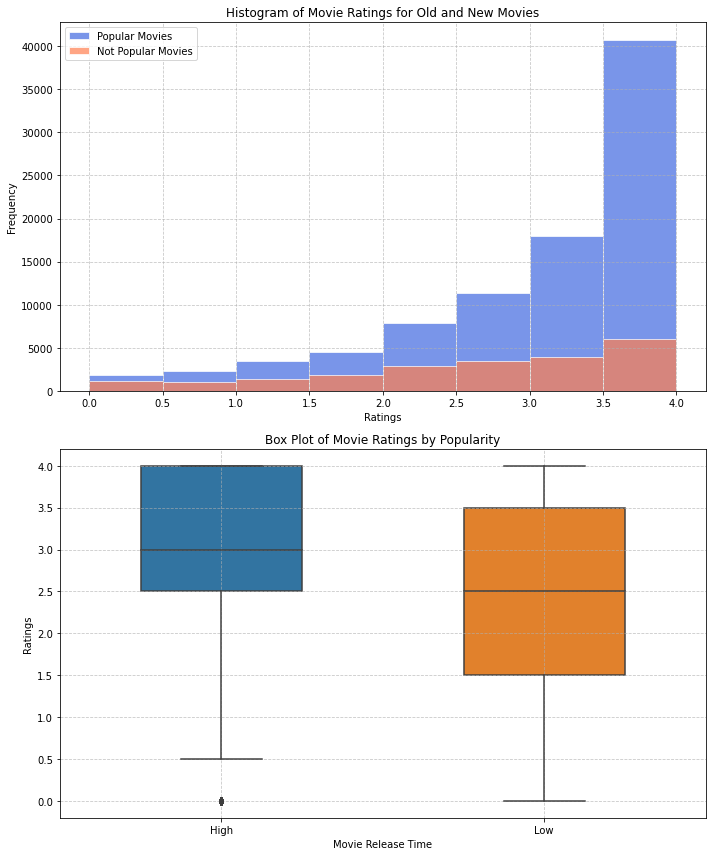

In [42]:
#first approach

# get subset rating dataset
df_rating = df.iloc[:, :400]

# find the count of each movie
rating_counts = df_rating.count()
df_counts = pd.DataFrame({'movie': df.columns[:400], 'rating_count': rating_counts})
# find the median count of the ratings
median_count = rating_counts.median()

# Separate the ratings into two different groups based on popularity
mask = df_counts['rating_count'] > median_count
high_popularity_movies = df_counts[mask]['movie'].values
low_popularity_movies = df_counts[~mask]['movie'].values

high_pop_ratings = df[high_popularity_movies]
low_pop_ratings = df[low_popularity_movies]

high_pop_ratings_clean = high_pop_ratings.values.flatten()
low_pop_ratings_clean = low_pop_ratings.values.flatten()
high_pop_ratings_clean = high_pop_ratings_clean[~np.isnan(high_pop_ratings_clean)]
low_pop_ratings_clean = low_pop_ratings_clean[~np.isnan(low_pop_ratings_clean)]

statistic, p_value = mannwhitneyu(high_pop_ratings_clean, low_pop_ratings_clean, alternative='greater')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

if p_value < 0.005:
    print("The differences in the ratings between high popularity group and low popularity group are unlikely to be due to chance alone. Therefore, movies that are more popular are rated higher than movies that are less popular.")
else:
    print("There is no significant difference in ratings between the high popularity group and low popularity group.")
    
high_pop_ratings_df = df[high_popularity_movies].melt(var_name='Movie', value_name='Rating')
high_pop_ratings_df['Popularity'] = 'High'

low_pop_ratings_df = df[low_popularity_movies].melt(var_name='Movie', value_name='Rating')
low_pop_ratings_df['Popularity'] = 'Low'

# Combine both DataFrames
combined_ratings_df = pd.concat([high_pop_ratings_df, low_pop_ratings_df], ignore_index=True)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Histogram for old ratings
ax1.hist(high_pop_ratings_clean, bins=8, alpha=0.7, color='royalblue', label='Popular Movies', edgecolor='white')
ax1.hist(low_pop_ratings_clean, bins=8, alpha=0.7, color='coral', label='Not Popular Movies', edgecolor='white')
#ax1.hist([new_ratings, old_ratings], bins=5, alpha=0.7, color=["royalblue", "coral"], edgecolor="white", label=["High Popularity", "Low Popularity"])
ax1.set_title('Histogram of Movie Ratings for Old and New Movies')
ax1.set_xlabel('Ratings')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(visible=True, linestyle="--", alpha=0.7)

# Box plot
sns.boxplot(x='Popularity', y='Rating', data=combined_ratings_df, palette="tab10", width=0.5, ax=ax2)
ax2.set_title('Box Plot of Movie Ratings by Popularity')
ax2.set_xlabel('Movie Release Time')
ax2.set_ylabel('Ratings')
ax2.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Mann-Whitney U statistic: 33427.5, with p-value: 9.929258851707232e-35
The differences in the ratings between high popularity group and low popularity group are unlikely to be due to chance alone. Therefore, movies that are more popular are rated higher than movies that are less popular.


<Figure size 720x576 with 0 Axes>

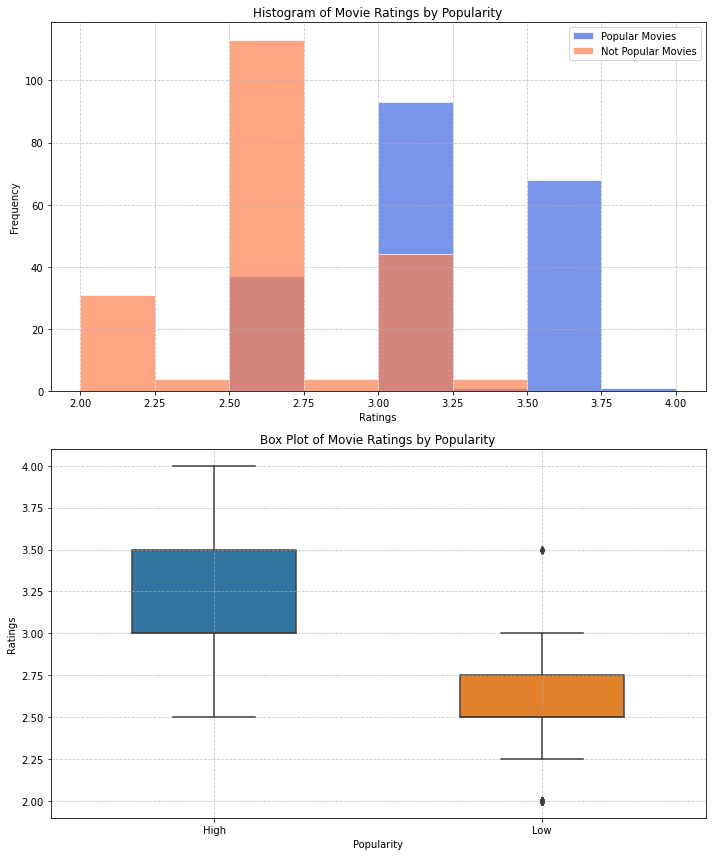

In [43]:
#second approach

# get subset rating dataset
df_rating = df.iloc[:, :400]

# find the count of each movie
rating_counts = df_rating.count()
df_counts = pd.DataFrame({'movie': df.columns[:400], 'rating_count': rating_counts})
# find the median count of the ratings
median_count = rating_counts.median()

# Separate the ratings into two different groups based on popularity
mask = df_counts['rating_count'] > median_count
high_popularity_movies = df_counts[mask]['movie'].values
low_popularity_movies = df_counts[~mask]['movie'].values

high_pop_ratings = df[high_popularity_movies].median()
low_pop_ratings = df[low_popularity_movies].median()

statistic, p_value = mannwhitneyu(high_pop_ratings, low_pop_ratings, alternative='greater')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

if p_value < 0.005:
    print("The differences in the ratings between high popularity group and low popularity group are unlikely to be due to chance alone. Therefore, movies that are more popular are rated higher than movies that are less popular.")
else:
    print("There is no significant difference in ratings between the high popularity group and low popularity group.")


# Prepare data for plotting
combined_ratings_df = pd.DataFrame({
    'Rating': np.concatenate([high_pop_ratings.values, low_pop_ratings.values]),
    'Popularity': ['High'] * len(high_pop_ratings) + ['Low'] * len(low_pop_ratings)
})

# Plotting
plt.figure(figsize=(10, 8))

# Set up the figure and axes for histogram and box plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Histogram for high and low popularity ratings
ax1.hist(high_pop_ratings.dropna(), bins=6, alpha=0.7, color='royalblue', label='Popular Movies', edgecolor='white')
ax1.hist(low_pop_ratings.dropna(), bins=6, alpha=0.7, color='coral', label='Not Popular Movies', edgecolor='white')
ax1.set_title('Histogram of Movie Ratings by Popularity')
ax1.set_xlabel('Ratings')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(visible=True, linestyle="--", alpha=0.7)

# Box plot for ratings by popularity (individual plots for clarity)
sns.boxplot(x='Popularity', y='Rating', data=combined_ratings_df, palette="tab10", width=0.5, ax=ax2)
ax2.set_title('Box Plot of Movie Ratings by Popularity')
ax2.set_xlabel('Popularity')
ax2.set_ylabel('Ratings')
ax2.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## Q2 - Are movies that are newer rated differently than movies that are older? 
##### [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new

Mann-Whitney U statistic: 1556898873.0, with p-value: 0.0021087243184198757
The difference in the ratings between new movies and old movies is unlikely due to chance alone. Movies that are newer rated differently than movies that are older.


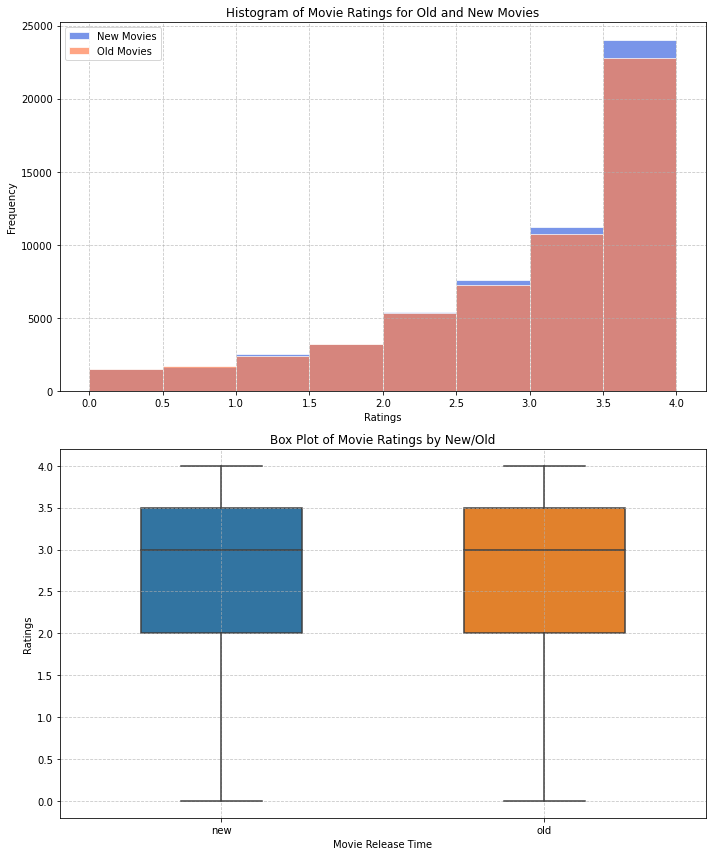

In [44]:
# Get subset rating dataset
df_rating = df.iloc[:, :400]

# Find the median year from the column names
year = df_rating.columns.str.extract(r'\((\d+)\)')[0]  # Extract year
year = pd.to_numeric(year, errors='coerce')  # Convert to numeric, coerce errors to NaN

# Calculate median year, ignoring NaNs
median_year = year.median()

# Create a mask to identify old and new movies
mask = year > median_year

# Use the mask to separate the column names
old_columns = df_rating.columns[~mask.fillna(False)]  # Fill NaNs with False for old movies
new_columns = df_rating.columns[mask.fillna(False)]    # Fill NaNs with False for new movies

# Separate the rating into two different groups
old_ratings = df_rating[old_columns]
new_ratings = df_rating[new_columns]  

old_ratings_clean = old_ratings.values.flatten()
new_ratings_clean = new_ratings.values.flatten()
old_ratings_clean = old_ratings_clean[~np.isnan(old_ratings_clean)]
new_ratings_clean = new_ratings_clean[~np.isnan(new_ratings_clean)]

# Conduct Mann-Whitney U test to check for differences
statistic, p_value = mannwhitneyu(old_ratings_clean, new_ratings_clean, alternative='two-sided')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

if p_value < 0.005:
    print("The difference in the ratings between new movies and old movies is unlikely due to chance alone. Movies that are newer rated differently than movies that are older.")
else:
    print("There is no significant difference in ratings between new movies and old movies.")

new_ratings_df = df[new_columns].melt(var_name='Movie', value_name='Rating')
new_ratings_df['time'] = 'new'

old_ratings_df = df[old_columns].melt(var_name='Movie', value_name='Rating')
old_ratings_df['time'] = 'old'

# Combine both DataFrames
combined_ratings_df = pd.concat([new_ratings_df, old_ratings_df], ignore_index=True)
combined_ratings_df = combined_ratings_df.dropna()

# Set up the figure and axes
fig, (ax3, ax4) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Histogram for old ratings
ax3.hist(new_ratings_clean, bins=8, alpha=0.7, color='royalblue', label='New Movies', edgecolor='white')
ax3.hist(old_ratings_clean, bins=8, alpha=0.7, color='coral', label='Old Movies', edgecolor='white')
#ax1.hist([new_ratings, old_ratings], bins=5, alpha=0.7, color=["royalblue", "coral"], edgecolor="white", label=["High Popularity", "Low Popularity"])
ax3.set_title('Histogram of Movie Ratings for Old and New Movies')
ax3.set_xlabel('Ratings')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(visible=True, linestyle="--", alpha=0.7)

# Box plot
sns.boxplot(x='time', y='Rating', data=combined_ratings_df, palette="tab10", width=0.5, ax=ax4)
ax4.set_title('Box Plot of Movie Ratings by New/Old')
ax4.set_xlabel('Movie Release Time')
ax4.set_ylabel('Ratings')
ax4.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Mann-Whitney U statistic: 18127.5, with p-value: 0.08873661144000093
There is no significant difference in ratings between new movies and old movies.


<Figure size 720x576 with 0 Axes>

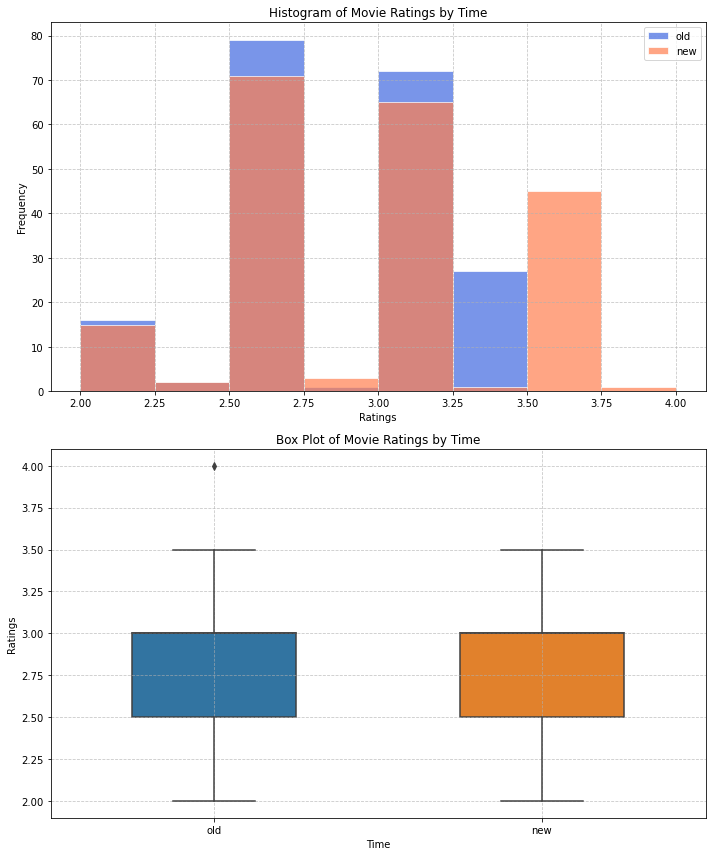

In [45]:
# Get subset rating dataset
df_rating = df.iloc[:, :400]

# Find the median year from the column names
year = df_rating.columns.str.extract(r'\((\d+)\)')[0]  # Extract year
year = pd.to_numeric(year, errors='coerce')  # Convert to numeric, coerce errors to NaN

# Calculate median year, ignoring NaNs
median_year = year.median()

# Create a mask to identify old and new movies
mask = year >= median_year

# Use the mask to separate the column names
old_columns = df_rating.columns[~mask.fillna(False)]  # Fill NaNs with False for old movies
new_columns = df_rating.columns[mask.fillna(False)]    # Fill NaNs with False for new movies

# Separate the rating into two different groups
old_ratings = df_rating[old_columns].median()
new_ratings = df_rating[new_columns].median()

# Conduct Mann-Whitney U test to check for differences
statistic, p_value = mannwhitneyu(old_ratings, new_ratings, alternative='two-sided')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

if p_value < 0.005:
    print("The difference in the ratings between new movies and old movies is unlikely due to chance alone. Movies that are newer rated differently than movies that are older.")
else:
    print("There is no significant difference in ratings between new movies and old movies.")

# Prepare data for plotting
combined_ratings_df = pd.DataFrame({
    'Rating': np.concatenate([new_ratings.values, old_ratings.values]),
    'Time': ['old'] * len(old_ratings) + ['new'] * len(new_columns)
})

# Plotting
plt.figure(figsize=(10, 8))

# Set up the figure and axes for histogram and box plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Histogram for high and low popularity ratings
ax1.hist(old_ratings.dropna(), bins=6, alpha=0.7, color='royalblue', label='old', edgecolor='white')
ax1.hist(new_ratings.dropna(), bins=8, alpha=0.7, color='coral', label='new', edgecolor='white')
ax1.set_title('Histogram of Movie Ratings by Time')
ax1.set_xlabel('Ratings')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(visible=True, linestyle="--", alpha=0.7)

# Box plot for ratings by popularity (individual plots for clarity)
sns.boxplot(x='Time', y='Rating', data=combined_ratings_df, palette="tab10", width=0.5, ax=ax2)
ax2.set_title('Box Plot of Movie Ratings by Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Ratings')
ax2.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

 ## Q3 - Is enjoyment of ‘Shrek(2001)’ gendered, i.e. do male and female viewers rate it differently?

Mann-Whitney U statistic: 96830.5, with p-value: 0.050536625925559006
There is no significant difference in ratings between new movies and old movies.


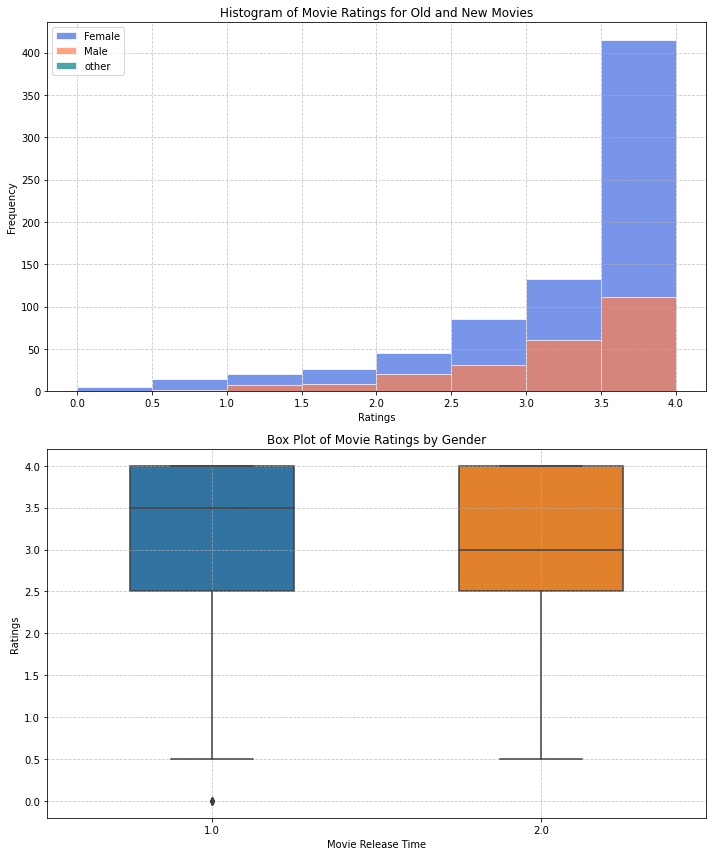

In [63]:
df_Shrek = df[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]
df_Shrek = df_Shrek[(df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1) | 
                    (df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2)]
df_Shrek_female = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
df_Shrek_male = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]
df_Shrek_other = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 3]

female_clean = df_Shrek_female.dropna()
male_clean = df_Shrek_male.dropna()
other_clean = df_Shrek_other.dropna()

# Conduct Mann-Whitney U test to check for differences
statistic, p_value = mannwhitneyu(female_clean, male_clean, alternative='two-sided')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

if p_value < 0.005:
    print("The difference in the ratings between new movies and old movies is unlikely due to chance alone. Movies that are newer rated differently than movies that are older.")
else:
    print("There is no significant difference in ratings between new movies and old movies.")

# Set up the figure and axes
fig, (ax5, ax6) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Histogram for old ratings
ax5.hist(female_clean, bins=8, alpha=0.7, color='royalblue', label='Female', edgecolor='white')
ax5.hist(male_clean, bins=7, alpha=0.7, color='coral', label='Male', edgecolor='white')
ax5.hist(other_clean, bins=7, alpha=0.7, color = 'teal', label='other', edgecolor='white')
ax5.set_title('Histogram of Movie Ratings for Old and New Movies')
ax5.set_xlabel('Ratings')
ax5.set_ylabel('Frequency')
ax5.legend()
ax5.grid(visible=True, linestyle="--", alpha=0.7)

# Box plot
sns.boxplot(x='Gender identity (1 = female; 2 = male; 3 = self-described)', y='Shrek (2001)', data=df_Shrek, palette="tab10", width=0.5, ax=ax6)
ax6.set_title('Box Plot of Movie Ratings by Gender')
ax6.set_xlabel('Movie Release Time')
ax6.set_ylabel('Ratings')
ax6.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Mann-Whitney U statistic: 2342.0, with p-value: 0.826358951526508
There is no significant difference in ratings between new movies and old movies.


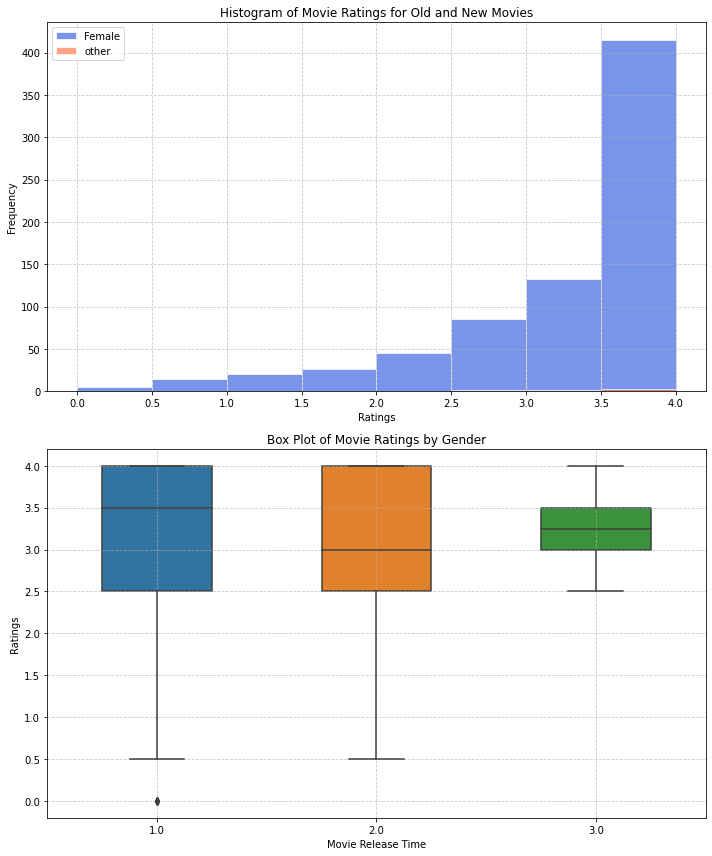

In [60]:
df_Shrek = df[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]
# df_Shrek = df_Shrek[(df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1) | 
#                     (df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2)]
df_Shrek_female = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
df_Shrek_male = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]
df_Shrek_other = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 3]

female_clean = df_Shrek_female.dropna()
male_clean = df_Shrek_male.dropna()
other_clean = df_Shrek_other.dropna()

# Conduct Mann-Whitney U test to check for differences
statistic, p_value = mannwhitneyu(female_clean, other_clean, alternative='two-sided')

# Print the results
print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

if p_value < 0.005:
    print("The difference in the ratings between new movies and old movies is unlikely due to chance alone. Movies that are newer rated differently than movies that are older.")
else:
    print("There is no significant difference in ratings between new movies and old movies.")

# #Set up the figure and axes
# fig, (ax5, ax6) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# # Histogram for old ratings
# ax5.hist(female_clean, bins=8, alpha=0.7, color='royalblue', label='Female', edgecolor='white')
# ax5.hist(other_clean, bins=3, alpha=0.7, color='coral', label='other', edgecolor='white')
# ax5.set_title('Histogram of Movie Ratings for Old and New Movies')
# ax5.set_xlabel('Ratings')
# ax5.set_ylabel('Frequency')
# ax5.legend()
# ax5.grid(visible=True, linestyle="--", alpha=0.7)

# Box plot
sns.boxplot(x='Gender identity (1 = female; 2 = male; 3 = self-described)', y='Shrek (2001)', data=df_Shrek, palette="tab10", width=0.5, ax=ax6)
ax6.set_title('Box Plot of Movie Ratings by Gender')
ax6.set_xlabel('Movie Release Time')
ax6.set_ylabel('Ratings')
ax6.grid(visible=True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [70]:
df_Shrek = df[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]
df_Shrek_female = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
df_Shrek_male = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]
df_Shrek_other = df_Shrek['Shrek (2001)'][df_Shrek['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 3]

female_clean = df_Shrek_female.dropna()
male_clean = df_Shrek_male.dropna()
other_clean = df_Shrek_other.dropna()
# # Conduct Mann-Whitney U test to check for differences
# statistic, p_value = mannwhitneyu(male_clean, other_clean, alternative='two-sided')

# # Print the results
# print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

# if p_value < 0.005:
#     print("The difference in the ratings between new movies and old movies is unlikely due to chance alone. Movies that are newer rated differently than movies that are older.")
# else:
#     print("There is no significant difference in ratings between new movies and old movies.")

# #Set up the figure and axes
# fig, (ax5, ax6) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# # Histogram for old ratings
# ax5.hist(male_clean, bins=7, alpha=0.7, color='royalblue', label='male', edgecolor='white')
# ax5.hist(other_clean, bins=3, alpha=0.7, color='coral', label='other', edgecolor='white')
# ax5.set_title('Histogram of Movie Ratings for Old and New Movies')
# ax5.set_xlabel('Ratings')
# ax5.set_ylabel('Frequency')
# ax5.legend()
# ax5.grid(visible=True, linestyle="--", alpha=0.7)

# # Box plot
# sns.boxplot(x='Gender identity (1 = female; 2 = male; 3 = self-described)', y='Shrek (2001)', data=df_Shrek, palette="tab10", width=0.5, ax=ax6)
# ax6.set_title('Box Plot of Movie Ratings by Gender')
# ax6.set_xlabel('Movie Release Time')
# ax6.set_ylabel('Ratings')
# ax6.grid(visible=True, linestyle="--", alpha=0.7)

# plt.tight_layout()
# plt.show()

9       4.0
13      3.0
15      3.5
19      2.0
22      3.0
       ... 
1082    4.0
1084    1.0
1088    2.5
1089    3.0
1090    3.0
Name: Shrek (2001), Length: 241, dtype: float64

## What proportion of movies are rated differently by male and female viewer

In [87]:
different_num = 0

for i in range(0,400):
    df_ = df.iloc[:,[i,474]]
    column_title = df.columns[i]
    df_female = df_[column_title][df_['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
    df_male = df_[column_title][df_['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]

    female_clean = df_female.dropna()
    male_clean = df_male.dropna()

    # Conduct Mann-Whitney U test to check for differences
    statistic, p_value = mannwhitneyu(female_clean, male_clean, alternative='two-sided')

    # Print the results
    #print(f'Mann-Whitney U statistic: {statistic}, with p-value: {p_value}')

    if p_value < 0.005:
        different_num += 1
        
proportion_different = different_num / 400
print(f'proportion of movies are rated differently by male and female viewer: {proportion_different}')

proportion of movies are rated differently by male and female viewer: 0.125
